In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import matplotlib.pyplot as plt
from input_noise_dataset import NoiseDataset
import torchvision
from pytorch_pretrained_biggan import BigGAN
from os import listdir, path
import gc
import string
import random

In [3]:
device = torch.device("cpu")

In [4]:
dataset = NoiseDataset()

In [7]:
biggan = BigGAN.from_pretrained('biggan-deep-512').to(device)
inputTransformer = torch.load("trained_models/input_transformer.pkl", map_location=torch.device('cpu')).to(device)
discriminator = torch.load("trained_models/abstract_image_discriminator.pkl", map_location=torch.device('cpu')).to(device)
feedbackPredictor = torch.load("trained_models/feedback_predictor.pkl", map_location=torch.device('cpu')).to(device)
torch.cuda.empty_cache()

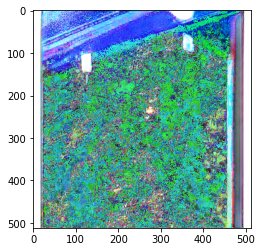

Abstractness: 1.00
Feedback: 3.26



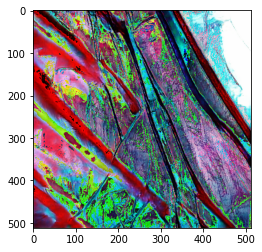

Abstractness: 1.00
Feedback: 3.16



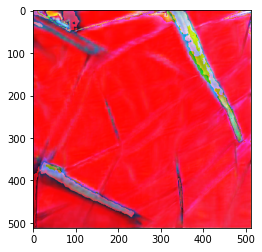

Abstractness: 1.00
Feedback: 5.21



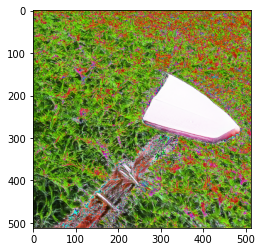

Abstractness: 1.00
Feedback: 2.16



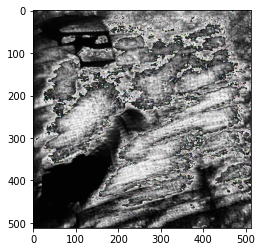

Abstractness: 1.00
Feedback: 2.15



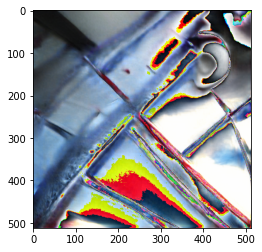

Abstractness: 1.00
Feedback: 2.94



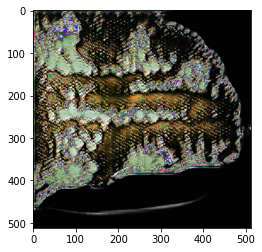

Abstractness: 1.00
Feedback: 1.95



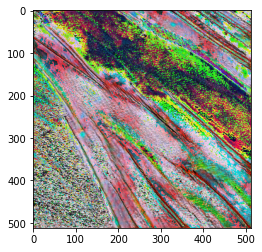

Abstractness: 1.00
Feedback: 3.13



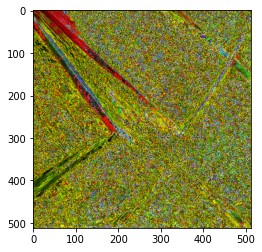

Abstractness: 1.00
Feedback: 2.03



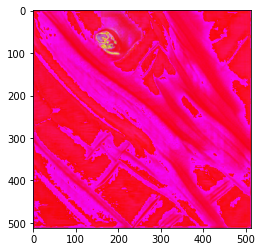

Abstractness: 1.00
Feedback: 4.68



In [8]:
numberOfImagesToGenerate = 10
generatedImagesDir = "image_data/generated"
letters = string.ascii_letters

for i in range(numberOfImagesToGenerate):
    initialInput = dataset[0][0].to(device)
    transformedInput = inputTransformer(initialInput)
    generatedImage = biggan(transformedInput[0], transformedInput[1], 0.99)
    isAbstract = discriminator(generatedImage).item()
    feedback = feedbackPredictor(generatedImage).item()
    pilImage = torchvision.transforms.ToPILImage()(torch.squeeze(generatedImage, dim=0))
    randomString = ''.join(random.choice(letters) for i in range(30))
    pilImage.save(path.join(generatedImagesDir, "generated_image_{}.jpg".format(randomString))) 
    del generatedImage
    gc.collect()
    torch.cuda.empty_cache()
    plt.imshow(pilImage)
    plt.show()

    print("Abstractness: {:.2f}".format(isAbstract))
    print("Feedback: {:.2f}".format(feedback))
    print()